In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os, re
import sys, time
#from forecast import fit
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from scipy.interpolate import RegularGridInterpolator, RectBivariateSpline
from catwoman.shelter import Cat
import ksz.utils as utils
from ksz.parameters import *
import ksz.Pee
import ksz.KSZ
import ksz.analyse as analyse

In [4]:
np.set_printoptions(threshold=np.inf, precision=7, suppress=True)
plt.rc('font', family='serif')

In [10]:
home_dir = f'{home_dir}'

### Investigating smoothing effect of binning size

Here we're investigating the effect of decreasing the binning as a way to smooth the electron power spectrum, in order to see its effect on the kSZ spectrum.

In [9]:
sn = '10038'
sim_check = Cat(sn)

In [31]:
sim = Cat(sn,
           verbose=True,
           path_sim=f'{home_dir}/ps_ee',
       #    path_spectra=f'{home_dir}/spectra/Pee',
           path_ion=f'{home_dir}/kSZ/data/LoReLi_summaries/ion_histories_full.npz',
           path_params=f'{home_dir}/kSZ/data/LoReLi_summaries/param_files', LoReLi_format=True)

Loading sim number 10038...
You have told me that data lives in the following places:
	params: /Users/emcbride/kSZ/data/LoReLi_summaries/param_files

Fetching params...

Loading precalculated spectra (LoReLi format). If you would like fresh spectra, rerun with reinitialise_spectra=True

Fetching reference files as required for LoReLi format...
Fetching redshifts...
No redshift file with the extension .dat...trying .txt...
Indices: [array([0]), array([3]), array([6]), array([9]), array([12]), array([15]), array([18]), array([21]), array([24]), array([27]), array([30]), array([33]), array([36]), array([39]), array([42]), array([45]), array([48]), array([51]), array([54]), array([57]), array([60]), array([63]), array([66]), array([69]), array([72]), array([75]), array([78]), array([81]), array([84]), array([87]), array([90]), array([93]), array([96]), array([99]), array([102]), array([105]), array([108]), array([111]), array([114]), array([117]), array([120]), array([123]), array([126]), 

In [25]:
sim.redshift_keys

{'001': 53.48472,
 '002': 40.6952,
 '003': 33.46641,
 '004': 27.8816,
 '005': 24.71079,
 '006': 22.28757,
 '007': 20.36476,
 '008': 18.79519,
 '009': 17.48531,
 '010': 16.37257,
 '011': 15.41341,
 '012': 14.5765,
 '013': 13.83868,
 '014': 13.18242,
 '015': 12.59418,
 '016': 12.06334,
 '017': 11.58143,
 '018': 11.14162,
 '019': 10.73831,
 '020': 10.36687,
 '021': 10.02347,
 '022': 9.704856,
 '023': 9.408288,
 '024': 9.13142,
 '025': 8.872238,
 '026': 8.629,
 '027': 8.400191,
 '028': 8.184488,
 '029': 7.980729,
 '030': 7.787888,
 '031': 7.605059,
 '032': 7.431433,
 '033': 7.266291,
 '034': 7.108987,
 '035': 6.958943,
 '036': 6.815635,
 '037': 6.678593,
 '038': 6.547388,
 '039': 6.421631,
 '040': 6.300971,
 '041': 6.185082,
 '042': 6.07367,
 '043': 5.966464,
 '044': 5.863215,
 '045': 5.763694,
 '046': 5.66769,
 '047': 5.575007,
 '048': 5.485466,
 '049': 5.398898,
 '050': 5.315149,
 '051': 5.234074,
 '052': 5.155539,
 '053': 5.079419,
 '054': 5.005596}

In [27]:
ion_histories[sn]['z']

array([18.795 , 18.333 , 17.897 , 17.485 , 17.095 , 16.725 , 16.373 ,
       16.038 , 15.718 , 15.413 , 15.122 , 14.843 , 14.577 , 14.321 ,
       14.075 , 13.839 , 13.612 , 13.393 , 13.182 , 12.979 , 12.783 ,
       12.594 , 12.411 , 12.234 , 12.063 , 11.898 , 11.737 , 11.581 ,
       11.43  , 11.284 , 11.142 , 11.003 , 10.869 , 10.738 , 10.611 ,
       10.487 , 10.367 , 10.249 , 10.135 , 10.023 ,  9.9147,  9.8085,
        9.7049,  9.6037,  9.5048,  9.4083,  9.3139,  9.2217,  9.1314,
        9.0432,  8.9568,  8.8722,  8.7895,  8.7084,  8.629 ,  8.5512,
        8.4749,  8.4002,  8.3269,  8.255 ,  8.1845,  8.1153,  8.0474,
        7.9807,  7.9153,  7.851 ,  7.7879,  7.7259,  7.6649,  7.6051,
        7.5462,  7.4883,  7.4314,  7.3755,  7.3204,  7.2663,  7.213 ,
        7.1606,  7.109 ,  7.0582,  7.0082,  6.9589,  6.9104,  6.8627,
        6.8156,  6.7693,  6.7236,  6.6786,  6.6342,  6.5905,  6.5474,
        6.5049,  6.463 ,  6.4216,  6.3809,  6.3406,  6.301 ,  6.2618,
        6.2232,  6.1

In [29]:
sim_check.z, sim.z

(array([18.79519 , 17.48531 , 16.37257 , 15.41341 , 14.5765  , 13.83868 ,
        13.18242 , 12.59418 , 12.06334 , 11.58143 , 11.14162 , 10.73831 ,
        10.36687 , 10.02347 ,  9.704856,  9.408288,  9.13142 ,  8.872238,
         8.629   ,  8.400191,  8.184488,  7.980729,  7.787888,  7.605059,
         7.431433,  7.266291,  7.108987,  6.958943,  6.815635,  6.678593,
         6.547388,  6.421631,  6.300971,  6.185082,  6.07367 ,  5.966464,
         5.863215,  5.763694,  5.66769 ,  5.575007,  5.485466,  5.398898,
         5.315149,  5.234074,  5.155539,  5.079419,  5.005596]),
 array([18.795 , 17.485 , 16.373 , 15.413 , 14.577 , 13.839 , 13.182 ,
        12.594 , 12.063 , 11.581 , 11.142 , 10.738 , 10.367 , 10.023 ,
         9.7049,  9.4083,  9.1314,  8.8722,  8.629 ,  8.4002,  8.1845,
         7.9807,  7.7879,  7.6051,  7.4314,  7.2663,  7.109 ,  6.9589,
         6.8156,  6.6786,  6.5474,  6.4216,  6.301 ,  6.1851,  6.0737,
         5.9665,  5.8632,  5.7637,  5.6677,  5.575 ,  5.4855, 

### Comparing the ionisation histories between me and Romain

In [11]:
check_z = np.load(f'{home_dir}/kSZ/data/LoReLi_summaries/ion_histories_full.npz', allow_pickle=True)
ion_histories = check_z['arr_0'].item()

In [12]:
sims = []
for filename in os.listdir(f'{home_dir}/spectra/Pee'):
    #files_LoReLi.append(filename)
    match = re.search(r'\d{5}', filename)
    sims.append(match.group())

print(f'{len(sims)} sims from me available')

ps_ee_list = []
for filename in os.listdir(f'{home_dir}/ps_ee'):
    #files_LoReLi.append(filename)
    match = re.search(r'\d{5}', filename)
    ps_ee_list.append(match.group())

print(f'{len(ps_ee_list)} sims in ps_ee available')

1250 sims from me available
7081 sims in ps_ee available


In [13]:
for filename in os.listdir('.'):
    #files_LoReLi.append(filename)
    match = re.search(r'\d{5}', filename)
    sims_v1.append(match.group())

NameError: name 'sims_v1' is not defined

In [41]:
if '18770' in ps_ee_list:
    print('hi')

hi


In [14]:
ps_ee_list = []
for filename in os.listdir(f'{home_dir}/ps_ee'):
    #files_LoReLi.append(filename)
    match = re.search(r'\d{5}', filename)
    ps_ee_list.append(match.group())

print(f'{len(ps_ee_list)} sims in ps_ee available')

7081 sims in ps_ee available


In [77]:
fn_z = f'{sim_LoReLi.path_sim}/simu{sn}/redshift_list.dat'

redshift_keys = {}
with open(fn_z) as f:
            for line in f:
                (val, key) = line.split()
                redshift_keys[key] = float(val)

Sim  13444 is loaded but there is no data!
Sim  13443 is loaded but there is no data!
Sim  13449 is loaded but there is no data!
Sim  13450 is loaded but there is no data!


Text(0, 0.5, 'x_HII')

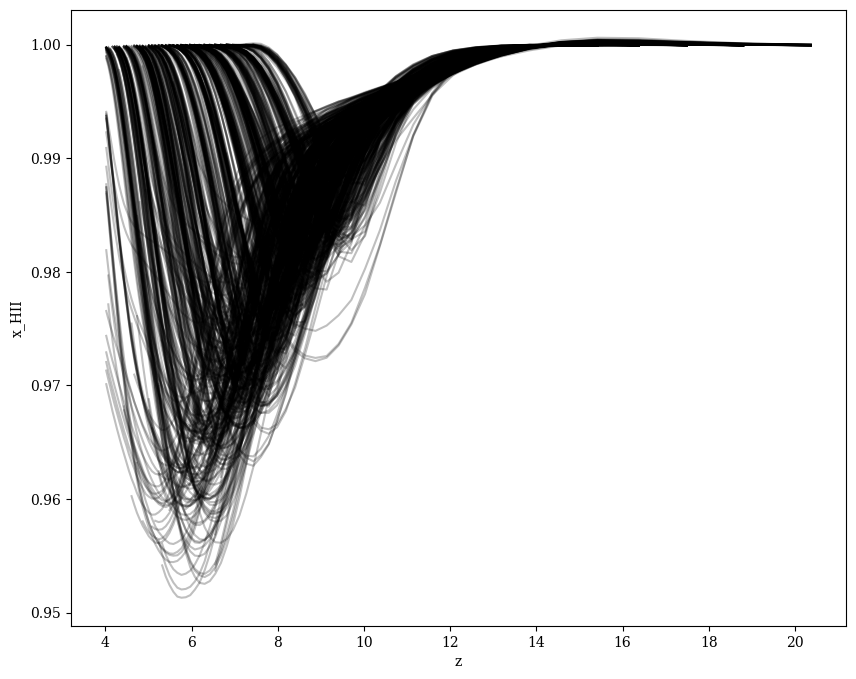

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

for sn in sims:
    if sn == '18770':
      continue
    if sn in ps_ee_list:
      sim_LoReLi = Cat(sn,
          verbose=False,
          path_sim=f'{home_dir}/ps_ee',
        #  path_spectra=f'{home_dir}/spectra/Pee',
          path_ion=f'{home_dir}/kSZ/data/LoReLi_summaries/ion_histories_full.npz',
          path_params=f'{home_dir}/kSZ/data/LoReLi_summaries/param_files', LoReLi_format=True)
      
      if np.any(np.isnan(sim_LoReLi.Pee)):
         continue
      
      sim_Lisa = Cat(sn,
          verbose=False,
        # path_sim=f'{home_dir}/ps_ee',
          path_spectra=f'{home_dir}/spectra/Pee',
          path_ion=f'{home_dir}/kSZ/data/LoReLi_summaries/ion_histories_full.npz',
          path_params=f'{home_dir}/kSZ/data/LoReLi_summaries/param_files', LoReLi_format=False)
      
      #plt.plot(sim_LoReLi.z, sim_LoReLi.xe, color='green', alpha=.5)
      if len(sim_LoReLi.z) == len(sim_Lisa.z):
        plt.plot(sim_LoReLi.z, sim_LoReLi.xe / sim_Lisa.xe, color='black', alpha=.25)

ax.set_xlabel('z')
ax.set_ylabel('x_HII')

In [108]:
np.arange(1,15501,500), np.linspace(1,15000,30)

(array([    1,   501,  1001,  1501,  2001,  2501,  3001,  3501,  4001,
         4501,  5001,  5501,  6001,  6501,  7001,  7501,  8001,  8501,
         9001,  9501, 10001, 10501, 11001, 11501, 12001, 12501, 13001,
        13501, 14001, 14501, 15001]),
 array([    1.       ,   518.2068966,  1035.4137931,  1552.6206897,
         2069.8275862,  2587.0344828,  3104.2413793,  3621.4482759,
         4138.6551724,  4655.862069 ,  5173.0689655,  5690.2758621,
         6207.4827586,  6724.6896552,  7241.8965517,  7759.1034483,
         8276.3103448,  8793.5172414,  9310.7241379,  9827.9310345,
        10345.137931 , 10862.3448276, 11379.5517241, 11896.7586207,
        12413.9655172, 12931.1724138, 13448.3793103, 13965.5862069,
        14482.7931034, 15000.       ]))

In [87]:
if spectra:
    print('yes')
if not spectra:
    print('no :(')

no :(


In [85]:
ion_histories[sn]['z']

array([17.485 , 17.095 , 16.725 , 16.373 , 16.038 , 15.718 , 15.413 ,
       15.122 , 14.843 , 14.577 , 14.321 , 14.075 , 13.839 , 13.612 ,
       13.393 , 13.182 , 12.979 , 12.783 , 12.594 , 12.411 , 12.234 ,
       12.063 , 11.898 , 11.737 , 11.581 , 11.43  , 11.284 , 11.142 ,
       11.003 , 10.869 , 10.738 , 10.611 , 10.487 , 10.367 , 10.249 ,
       10.135 , 10.023 ,  9.9147,  9.8085,  9.7049,  9.6037,  9.5048,
        9.4083,  9.3139,  9.2217,  9.1314,  9.0432,  8.9568,  8.8722,
        8.7895,  8.7084,  8.629 ,  8.5512,  8.4749,  8.4002,  8.3269,
        8.255 ,  8.1845,  8.1153,  8.0474,  7.9807,  7.9153,  7.851 ,
        7.7879,  7.7259,  7.6649,  7.6051,  7.5462,  7.4883,  7.4314,
        7.3755,  7.3204,  7.2663,  7.213 ,  7.1606,  7.109 ,  7.0582,
        7.0082,  6.9589,  6.9104,  6.8627,  6.8156,  6.7693,  6.7236,
        6.6786,  6.6342,  6.5905,  6.5474,  6.5049,  6.463 ,  6.4216,
        6.3809,  6.3406,  6.301 ,  6.2618,  6.2232,  6.1851,  6.1475,
        6.1103,  6.0

In [81]:
spectra = []
z_indices = []

for key in redshift_keys.keys():
    fn = ff'{home_dir}/ps_ee/simu{sn}/postprocessing/cubes/ps_dtb/powerspectrum_electrons{key}_logbins.dat'
   # print(sim_LoReLi.redshift_keys[key])
    if os.path.isfile(fn):
                            if np.any(np.isclose(ion_histories[sn]['z'], redshift_keys[key], atol=.001)):
                                index = np.where(np.isclose(ion_histories[sn]['z'], redshift_keys[key], atol=.001))[0][0]
                                z_indices.append(index)
                          #      print(f'Log has redshift {sim_LoReLi.redshift_keys[key]}')
                                s = np.genfromtxt(fn)
                                spectra.append(s)


In [84]:
spectra

[]

In [ ]:
sim_LoReLi_check.Pee[]

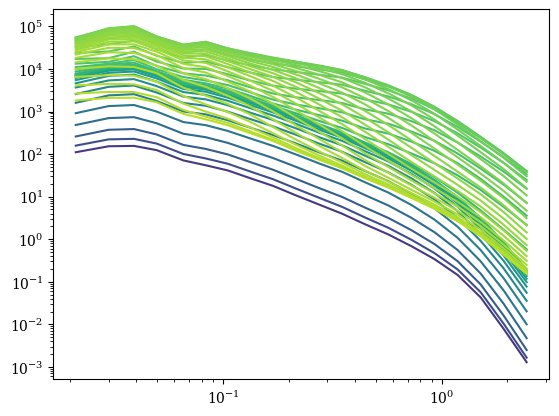

In [87]:
for i in range(sim_check.z.size):
    plt.loglog(sim_check.k, sim_check.Pee[i], color=cmap_z(norm_z(sim_check.z[i])))

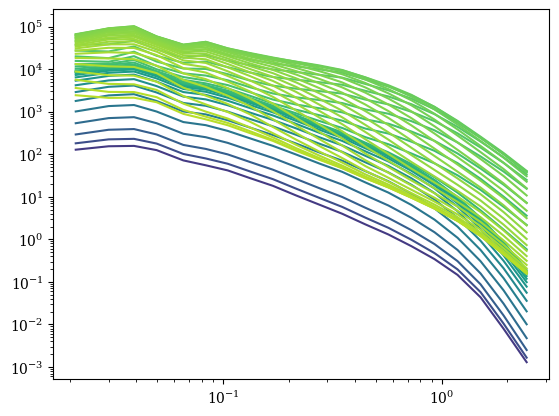

In [88]:
for i in range(sim.z.size):
    plt.loglog(sim.k, sim.Pee[i], color=cmap_z(norm_z(sim.z[i])))

In [94]:
sim.xe.shape

(47,)

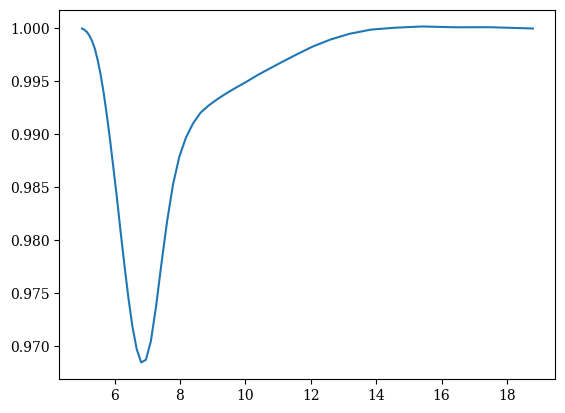

In [95]:
plt.plot(sim.z, sim.xe / sim_check.xe)

In [93]:
k = []
Pee = []
for i in range(0, sim.k.size - 1,2):
    k.append((sim.k[i] + sim.k[i + 1]) / 2.0)
    Pee.append((sim.Pee[:,i] +sim.Pee[:,i + 1]) / 2.0)

Pee = np.asarray(Pee).T

In [82]:
import scipy

print(scipy.__numpy_version__)

1.26.4


In [94]:
ells = np.linspace(1,15000,100)

LoReLi = ksz.KSZ.get_KSZ(ells, interpolate_xe=True, debug=False, interpolate_Pee=True,
                Pee_data=sim.Pee, xe_data=sim.xe, z_data=sim.z, k_data=sim.k, alpha0=alpha0, kappa=kappa,
                kmin=1e-6, kmax=3000, xemin=0.0, xemax=1.16, verbose=True, helium_interp=False)
    
LoReLi_smoothed = ksz.KSZ.get_KSZ(ells, interpolate_xe=True, debug=False, interpolate_Pee=True,
                Pee_data=Pee, xe_data=sim.xe, z_data=sim.z, k_data=k, alpha0=alpha0, kappa=kappa,
                kmin=1e-6, kmax=3000, xemin=0.0, xemax=1.16, verbose=True, helium_interp=False)
    

Late-time ionisation fraction: 1.00
min z: 0
max z: 1100
min xe: 0.0
max xe: 1.16
min k: 1e-06
max k: 3000
zre_h = 7.00, zend = 6.49
tau = 0.0536
Running CAMB...


/Users/emcbride/kSZ/src/ksz/KSZ.py:616: RuntimeWarning: divide by zero encountered in log10
  interp = RegularGridInterpolator(fit_points, values, bounds_error=False, fill_value=np.log10(0.0))


tau = 0.0536
Computing for 100 l on range [1,15000] with 1 threads
Late-time ionisation fraction: 1.00
min z: 0
max z: 1100
min xe: 0.0
max xe: 1.16
min k: 1e-06
max k: 3000
zre_h = 7.00, zend = 6.49
tau = 0.0536
Running CAMB...
tau = 0.0536
Computing for 100 l on range [1,15000] with 1 threads


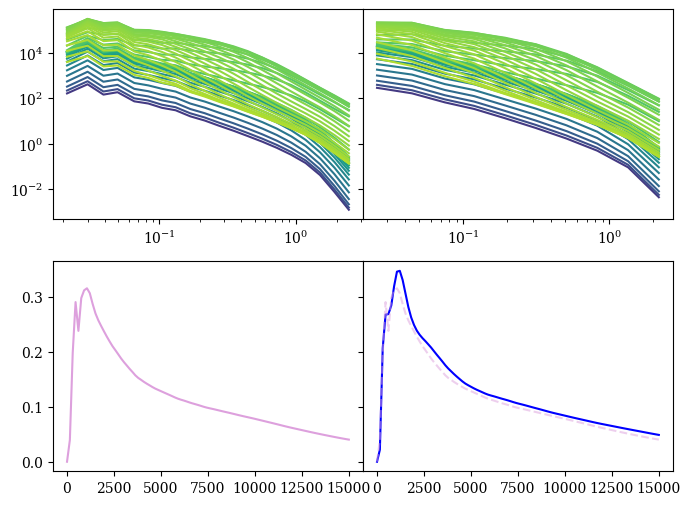

In [91]:
fig, ax = plt.subplots(2,2, figsize=(8,6), sharey='row')
fig.subplots_adjust(wspace=0.0)

for i in range(sim.z.size):
    ax[0,0].loglog(sim.k, sim.Pee[i], color= cmap_z(norm_z(sim.z[i])))
    ax[0,1].loglog(k, Pee[i], color= cmap_z(norm_z(sim.z[i])))

ax[1,0].plot(ells, LoReLi, color=colors[2])
ax[1,1].plot(ells, LoReLi_smoothed, color=colors[1])
ax[1,1].plot(ells, LoReLi, alpha=.5, ls='--', color=colors[2])

In [60]:
sn
['10038', '11022', '10842', '18733', '12615']

['10038', '11022', '10842', '18733', '12615']

In [62]:
test=[np.array([1.32735443e-04, 1.32014524e-04, 1.31652751e-04, 1.31907656e-04,
       1.33575297e-04, 1.37718647e-04, 1.45675231e-04, 1.59057352e-04,
       1.79686270e-04, 2.09513983e-04, 2.50543693e-04, 3.04780924e-04,
       3.74167024e-04, 4.60544755e-04, 5.65592923e-04, 6.90908945e-04,
       8.37833854e-04, 1.00765260e-03, 1.20146301e-03, 1.42015140e-03,
       1.66467971e-03, 1.93795715e-03, 2.24475480e-03, 2.59701499e-03,
       3.01710535e-03, 3.55152501e-03, 4.29545718e-03, 5.44063033e-03,
       7.33622668e-03, 1.05385611e-02, 1.58802720e-02, 2.45745957e-02,
       3.82437550e-02, 5.89322664e-02, 8.91228578e-02, 1.31498999e-01,
       1.88835119e-01, 2.63292403e-01, 3.55652244e-01, 4.64065883e-01,
       5.82506979e-01, 7.00019730e-01, 8.03976187e-01, 8.85951374e-01,
       9.42097297e-01, 9.75304395e-01]), np.array([0.02122698, 0.03001948, 0.03920381, 0.04973011, 0.06590618,
       0.08347068, 0.10511551, 0.132222  , 0.1692068 , 0.21626689,
       0.27545828, 0.35084946, 0.44754454, 0.57098432, 0.7276318 ,
       0.92742668, 1.1823019 , 1.50682116, 1.92042669, 2.44768982])]

In [64]:
import ksz.utils


ksz.utils.find_index(test[0])

2

In [65]:
print(test[0][0:3])

[0.0001327 0.000132  0.0001317]


Now on run 0...
Loading sim number 11022...
You have told me that data lives in the following places:

params: /Users/emcbride/kSZ/data/LoReLi/simu11022

Fetching reference files...
Fetching redshifts...
Simulation redshifts from 6.300971 to 53.48472
Fetching params since you asked so nicely...
Fetching xion cubes since you asked so nicely...
Fetching density cubes since you asked so nicely...
power spectrum settings:
{'bins': array([0.021227 , 0.0344833, 0.0560183, 0.091002 , 0.1478333, 0.2401558,
       0.3901343, 0.633775 , 1.0295706, 1.6725424, 2.7170531]), 'log_bins': True, 'get_variance': False, 'bin_ave': True}

Initialising spectra. This could take a while...

Calculating electron power spectrum at redshift 22.28757
Calculating electron power spectrum at redshift 20.36476
Calculating electron power spectrum at redshift 18.79519
Calculating electron power spectrum at redshift 17.48531
Calculating electron power spectrum at redshift 16.37257
Calculating electron power spectrum at

/Users/emcbride/forecast_reion_CMB/ksz_model.py:599: RuntimeWarning: divide by zero encountered in log10
  interp = RegularGridInterpolator(fit_points, values, bounds_error=False, fill_value=np.log10(0.0))
/Users/emcbride/forecast_reion_CMB/ksz_model.py:599: RuntimeWarning: divide by zero encountered in log10
  interp = RegularGridInterpolator(fit_points, values, bounds_error=False, fill_value=np.log10(0.0))


Computing for 100 l on range [1,5000] with 1 threads
Now on run 1...
Loading sim number 11022...
You have told me that data lives in the following places:

params: /Users/emcbride/kSZ/data/LoReLi/simu11022

Fetching reference files...
Fetching redshifts...
Simulation redshifts from 6.300971 to 53.48472
Fetching params since you asked so nicely...
Fetching xion cubes since you asked so nicely...
Fetching density cubes since you asked so nicely...
power spectrum settings:
{'bins': array([0.021227 , 0.0293338, 0.0405368, 0.0560183, 0.0774125, 0.1069773,
       0.1478333, 0.2042927, 0.2823147, 0.3901343, 0.5391316, 0.7450329,
       1.0295706, 1.4227769, 1.9661537, 2.7170531]), 'log_bins': True, 'get_variance': False, 'bin_ave': True}

Initialising spectra. This could take a while...

Calculating electron power spectrum at redshift 22.28757
Calculating electron power spectrum at redshift 20.36476
Calculating electron power spectrum at redshift 18.79519
Calculating electron power spectrum a

/Users/emcbride/miniforge3/envs/kSZ/lib/python3.12/site-packages/powerbox/tools.py:161: RuntimeWarning: invalid value encountered in divide
  np.bincount(
/Users/emcbride/miniforge3/envs/kSZ/lib/python3.12/site-packages/powerbox/tools.py:325: UserWarning: One or more radial bins had no cells within it.
  return angular_average(
/Users/emcbride/miniforge3/envs/kSZ/lib/python3.12/site-packages/powerbox/tools.py:180: RuntimeWarning: invalid value encountered in divide
  np.bincount(


Calculating electron power spectrum at redshift 20.36476
Calculating electron power spectrum at redshift 18.79519
Calculating electron power spectrum at redshift 17.48531
Calculating electron power spectrum at redshift 16.37257
Calculating electron power spectrum at redshift 15.41341
Calculating electron power spectrum at redshift 14.5765
Calculating electron power spectrum at redshift 13.83868
Calculating electron power spectrum at redshift 13.18242
Calculating electron power spectrum at redshift 12.59418
Calculating electron power spectrum at redshift 12.06334
Calculating electron power spectrum at redshift 11.58143
Calculating electron power spectrum at redshift 11.14162
Calculating electron power spectrum at redshift 10.73831
Calculating electron power spectrum at redshift 10.36687
Calculating electron power spectrum at redshift 10.02347
Calculating electron power spectrum at redshift 9.704856
Calculating electron power spectrum at redshift 9.408288
Calculating electron power spect

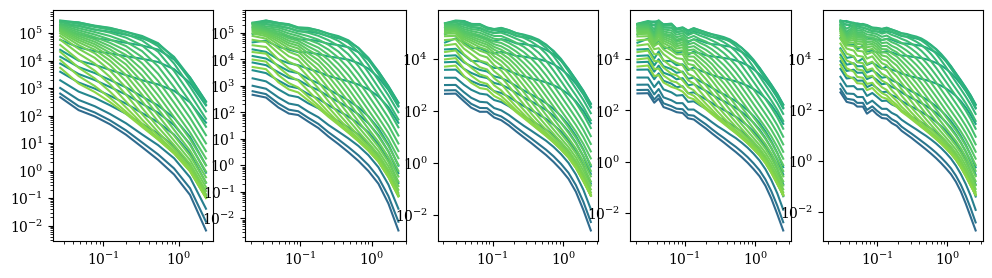

In [4]:
ells = np.linspace(1,5000, 100)
Pee = []
Pee_interp = []
spectra = []

fig, ax = plt.subplots(1,5, figsize=(12,3))

for i, b in enumerate([11,16,21,26,31]): 
    print(f'Now on run {i}...')
    pspec_kwargs = {'bins': np.geomspace(k_res[0], k_res[1], b),
                                    'log_bins': True,
                                    'get_variance': False,
                                    'bin_ave': True}
    
    sim = Cat('11022', reinitialise_spectra=True, pspec_kwargs=pspec_kwargs, verbose=True)

    for zi in range(sim.z.size):
      ax[i].loglog(sim.k, sim.Pee[zi], color=cmap_z(norm_z(sim.z[zi])))

    zrange = np.where((sim.xe >= .01) & (sim.xe <= .98))[0]
    krange = np.where((sim.k >= k_res[0]) & (sim.k <= 2.0))[0]
    
    KSZ = KSZ_power(verbose=True, interpolate_xe=True, interpolate_Pee=True,
                Pee_data=sim.Pee[np.ix_(zrange, krange)], xe_data=sim.xe[zrange],
                  z_data=sim.z[zrange], k_data=sim.k[krange])
  

    Pee.append((sim.k, sim.Pee))
    Pee_interp.append(KSZ.Pee_interpolated(z_integ[:,None], kp_integ))
    spectra.append(KSZ.run_ksz(ells=ells, patchy=True, Dells=True)[:,0])

# xe50 = np.argmin(np.abs(KSZ.xe_data - .5))
# xe80 = np.argmin(np.abs(KSZ.xe_data - .5))



Late-time ionisation fraction: 1.00
min z: 0
max z: 1100
min xe: 1e-10
max xe: 1.16
min k: 1e-05
max k: 3000.0
zre_h = 7.00, zend = 6.27
tau = 0.0506


/Users/emcbride/forecast_reion_CMB/ksz_model.py:599: RuntimeWarning: divide by zero encountered in log10
  interp = RegularGridInterpolator(fit_points, values, bounds_error=False, fill_value=np.log10(0.0))


Late-time ionisation fraction: 1.00
min z: 0
max z: 1100
min xe: 1e-10
max xe: 1.16
min k: 1e-05
max k: 3000.0
zre_h = 7.00, zend = 6.27
tau = 0.0506
Late-time ionisation fraction: 1.00
min z: 0
max z: 1100
min xe: 1e-10
max xe: 1.16
min k: 1e-05
max k: 3000.0
zre_h = 7.00, zend = 6.27
tau = 0.0506
Late-time ionisation fraction: 1.00
min z: 0
max z: 1100
min xe: 1e-10
max xe: 1.16
min k: 1e-05
max k: 3000.0
zre_h = 7.00, zend = 6.27
tau = 0.0506
Late-time ionisation fraction: 1.00
min z: 0
max z: 1100
min xe: 1e-10
max xe: 1.16
min k: 1e-05
max k: 3000.0
zre_h = 7.00, zend = 6.27
tau = 0.0506


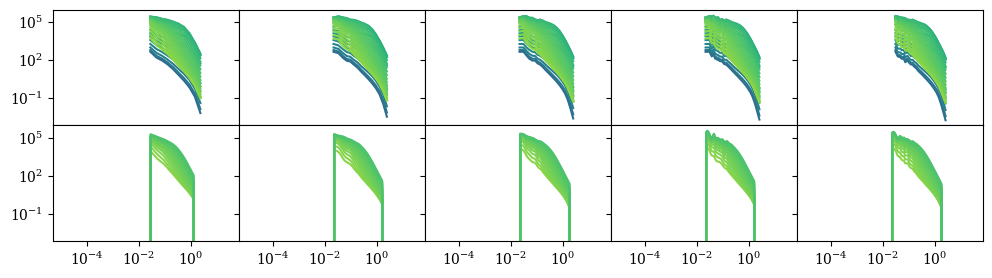

In [16]:
fig, ax = plt.subplots(2,5, figsize=(12,3), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.0, hspace=0.0)

for i, bP in enumerate(Pee):
    k, P = bP
    for zi in range(sim.z.size):
        ax[0,i].loglog(k, P[zi], color=cmap_z(norm_z(sim.z[zi])))

    zrange = np.where((sim.xe >= .01) & (sim.xe <= .98))[0]
    krange = np.where((k >= k_res[0]) & (k <= 2.0))[0]
    
    KSZ = KSZ_power(verbose=True, interpolate_xe=True, interpolate_Pee=True,
                Pee_data=P[np.ix_(zrange, krange)], xe_data=sim.xe[zrange],
                  z_data=sim.z[zrange], k_data=k[krange])
    
    for zi in range(z_integ.size):
        ax[1,i].loglog(kp_integ, KSZ.Pee_interpolated(z_integ[:,None], kp_integ)[zi], color=cmap_z(norm_z(z_integ[zi])))


In [26]:
xe = KSZ.xe_interpolated(z_integ)
xe50 = np.argmin(np.abs(xe - .5))
xe75 = np.argmin(np.abs(xe - .75))

print(xe[xe50], sim.xe[np.argmin(np.abs(sim.xe - .5))])
print(xe[xe75], sim.xe[np.argmin(np.abs(sim.xe - .75))])

0.46722527354964327 0.5004852131245167
0.7383045392251041 0.7579880883103951


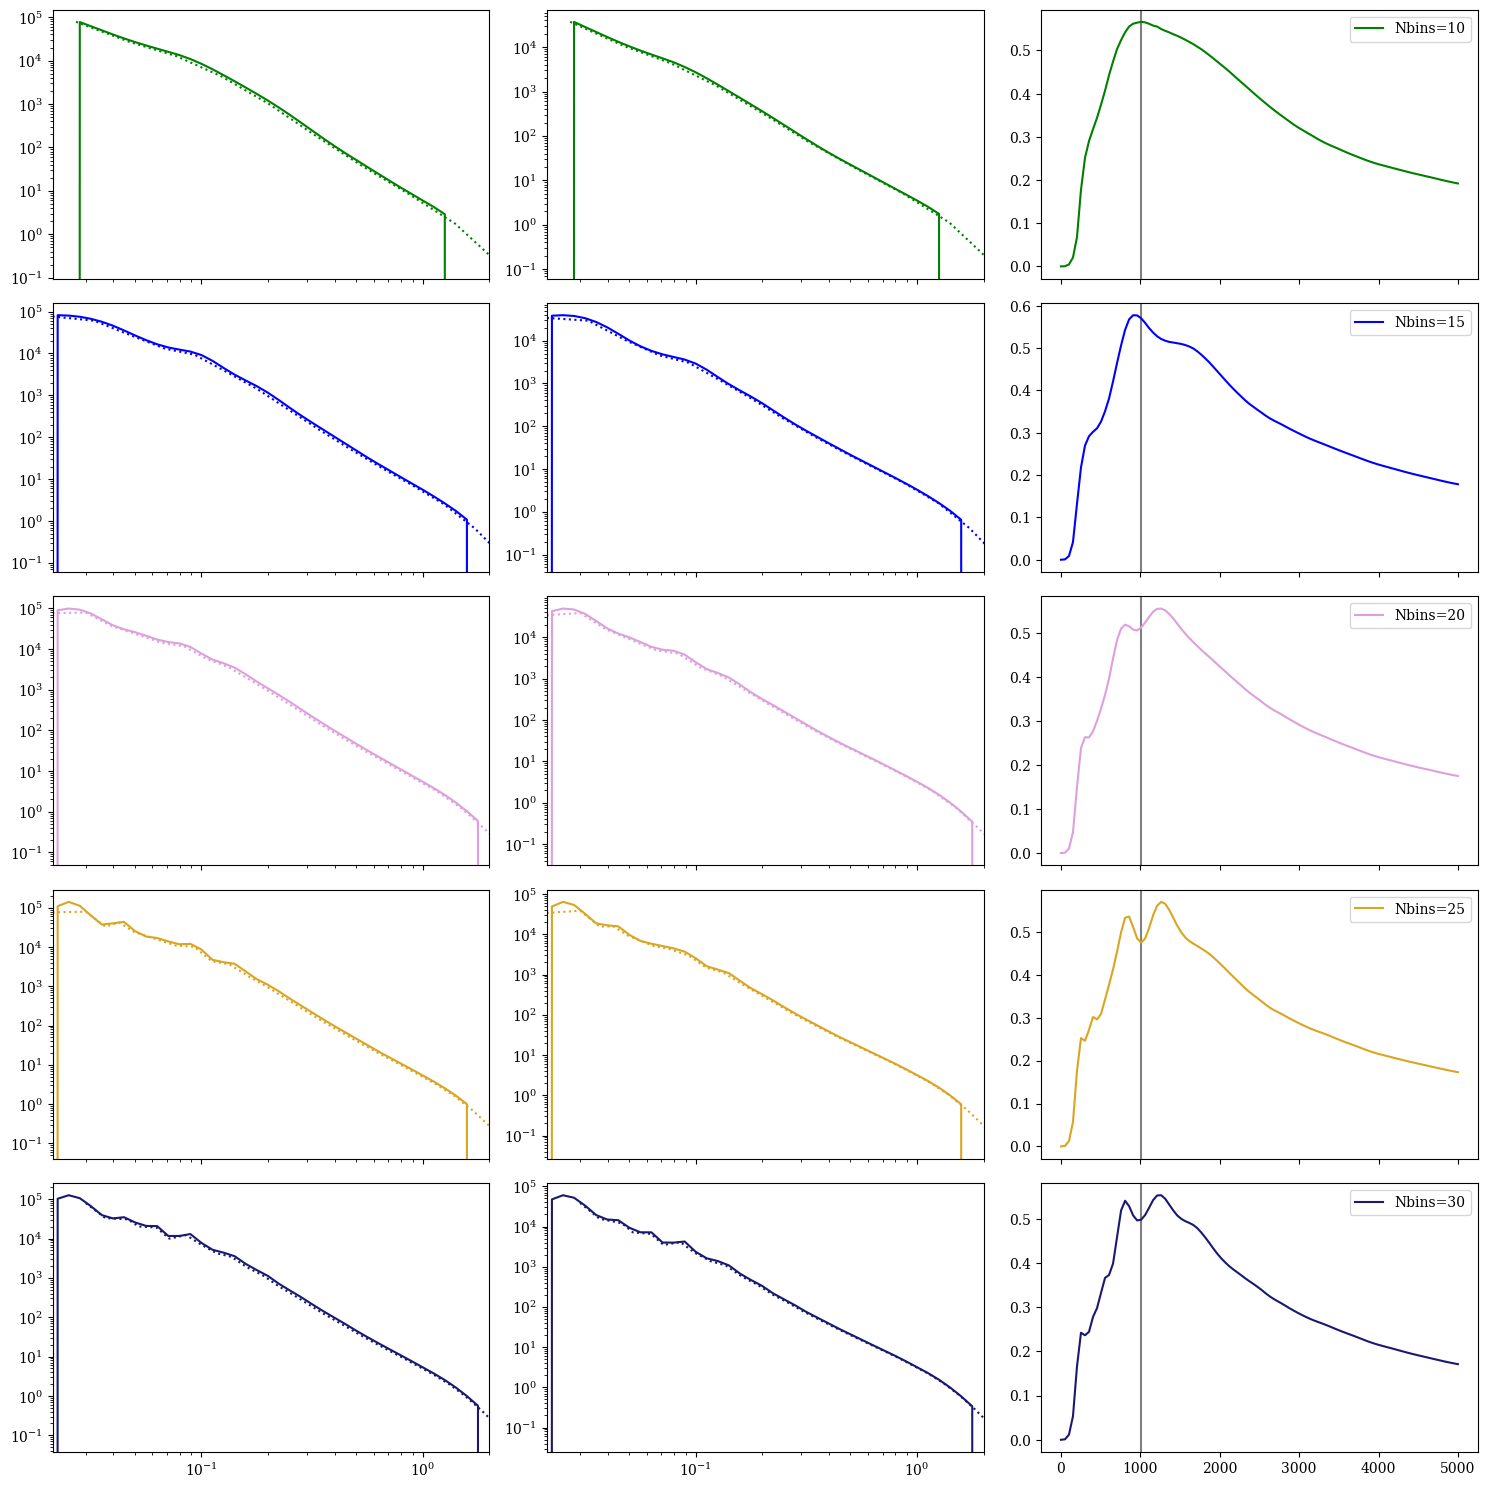

In [31]:
fig, axes = plt.subplots(5,3, figsize=(15,15), sharex='col')
fig.subplots_adjust(hspace=0.0)

for i, b in enumerate([11,16,21,26, 31]):
    ax = axes[i]
    k, P = Pee[i]

    if i == 0:
        max_ell = ells[np.argmax(spectra[i])]
    ax[0].loglog(k, P[np.argmin(np.abs(sim.xe - .5))], color=colors[i], ls=':')
    ax[1].loglog(k, P[np.argmin(np.abs(sim.xe - .8))], color=colors[i], ls=':')

    ax[0].loglog(kp_integ, Pee_interp[i][xe50], color=colors[i])
    ax[1].loglog(kp_integ, Pee_interp[i][xe75], color=colors[i])
    ax[2].axvline(max_ell, color='black', alpha=.5)
    ax[2].plot(ells, spectra[i], color=colors[i], label=f'Nbins={k.size}')

    ax[0].set_xlim(k_res[0], 2.0)
    ax[1].set_xlim(k_res[0], 2.0)

    ax[2].legend()
# axes[1].set_ylabel(r'\% of $C_\ell$')

#fig.suptitle(fr'Contribution to $C_\ell$ at $\ell = {ell}$')
fig.tight_layout()
# plt.savefig('redshift_contributions_l3000.png')

(0.021226977389120223, 2.7170531058073886)

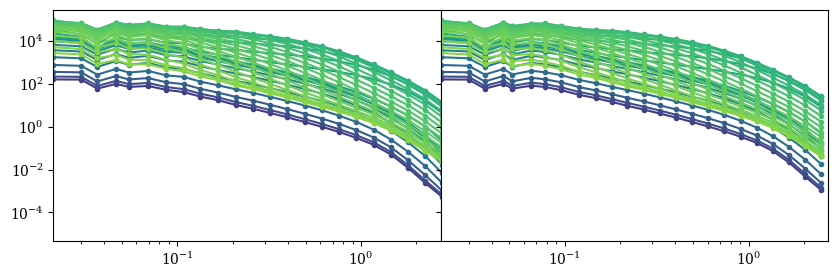

In [31]:
fig, ax = plt.subplots(1,2, figsize=(10,3), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.0)

for i in range(sim.z.size):
    ax[0].loglog(sim.k, sim.Pee[i], color=cmap_z(norm_z(sim.z[i])), marker='.')
    ax[1].loglog(sim_comp.k, sim_comp.Pee[i],
                  color=cmap_z(norm_z(sim_comp.z[i])), marker='.')
    
ax[0].set_xlim(*k_res)

sim.k[0], k_res[0]

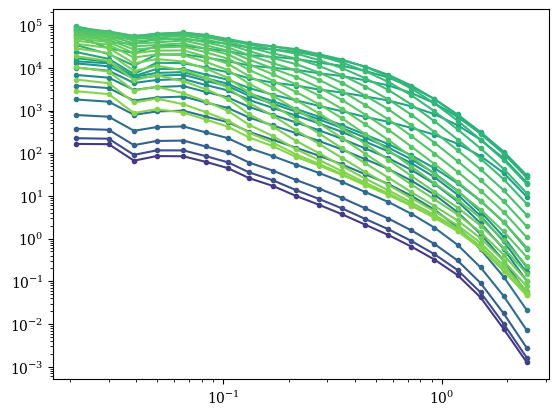

In [12]:
for i in range(sim.z.size):
    plt.loglog(sim.k, sim.Pee[i], color=cmap_z(norm_z(sim.z[i])), marker='.')


### Checking Romain's binning

In [35]:
for sn in sims:
    if (sn == '10510') or (sn == '10048'):
        continue
    sim = Cat(sn, reinitialise_spectra=True, save_spectra=True, verbose=True)

Loading sim number 10038...
You have told me that data lives in the following places:
	params: /Users/emcbride/kSZ/data/LoReLi/simu10038

Fetching reference files...
Fetching redshifts...
Fetching params...
Fetching xion cubes...
Fetching density cubes...

Simulation runs from z=53.48472 to z=5.005596
Power spectrum settings:
	{'bins': array([0.02122698, 0.02705507, 0.03448333, 0.04395109, 0.05601833,
       0.07139876, 0.09100204, 0.11598762, 0.14783326, 0.18842245,
       0.24015583, 0.30609317, 0.3901343 , 0.49724982, 0.63377505,
       0.80778472, 1.0295706 , 1.31225015, 1.67254238, 2.13175666,
       2.71705311]), 'log_bins': True, 'get_variance': False, 'bin_ave': True}

Initialising spectra since you asked so nicely! But this could take a while...

Calculating electron power spectrum at redshift 22.28757
Calculating electron power spectrum at redshift 20.36476
Calculating electron power spectrum at redshift 18.79519
Calculating electron power spectrum at redshift 17.48531
Calcul

In [46]:
sims = ['10038', '10048', '10510', '10842', '11022', '12615']

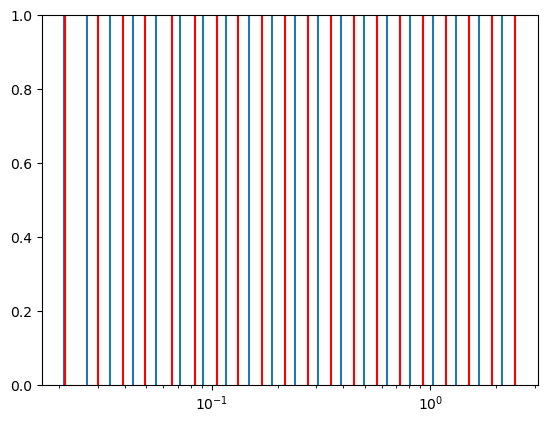

In [42]:
for k in spectra_log[i][:,0]:
    plt.axvline(k)
for k in sim.k:
    plt.axvline(k, color='red')

plt.xscale('log')

In [49]:
sim.params

{' \t \t  \tdebug': 'F ',
 ' \t \t  \trestart': 'F ',
 ' \t \t  \trestart_N': '11',
 ' \t \t  \tt_final': '94.5 ',
 '  \tbox_size': '296735.90504451 ',
 ' \t \t  \tsortie': '3 ',
 ' \t \t   \tdiagnosis_n': '1 ',
 ' \t \t  \tcollisions': '1 ',
 ' \t \t  \tboundary_condition': 'periodic ',
 ' \t \t  \tdtime': '0.7  ',
 ' \t \t   \ttheta': '0.7 ',
 ' \t \t  \teps': '70 ',
 ' \t \t  \tuse_quad': 'T ',
 ' \t \t  \tuse_cosmo': 'T   ',
 ' \t \t  \tuse_cooling': 'T ',
 ' \t \t  \tuse_sticky': 'F ',
 ' \t \t  \tUO': '0.01 ',
 ' \t \t  \tncrit': '15 ',
 ' \t \t  \tjust_radiative': 'F   ',
 ' \t \t  \tuse_quasar': 'T ',
 ' \t \t  \tonly_dynamic': 'F  ',
 ' \t \t  \tUV_RT_dynamic_use': 'T  ',
 ' \t \t  \tuse_Helium': 'F  ',
 ' \t \t  \tLyA_from_Xray': 'F  ',
 ' \t \t  \tsave_lightcones': 'T  ',
 ' \t \t  \telasticity_params': '(0.999996, 1.)  ',
 ' \t \t  \tion_escapefrac': '0.003  ',
 ' \t \t  \tXray_Lfunc': '0.00192  ',
 ' \t \t  \toverdensity_thresh': '100.   ',
 ' \t \t  \tgasconversion_timesc

In [59]:
spectra_log[0]

(20, 3)

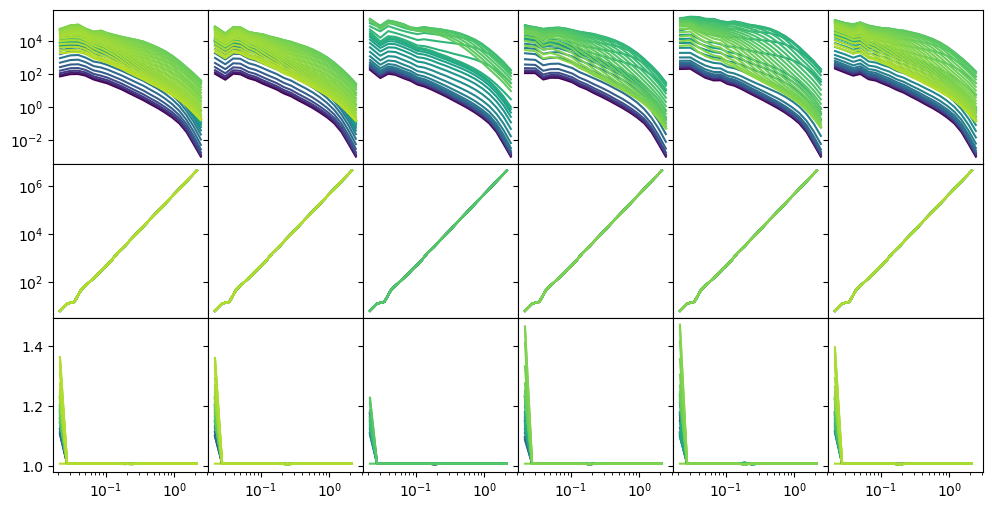

In [60]:
fig, ax = plt.subplots(3,len(sims), figsize=(12,6), sharex=True, sharey='row')
fig.subplots_adjust(wspace=0.0, hspace=0.0)
for i, sn in enumerate(sims):
    axes = ax[:,i]
    sim = Cat(sn, verbose=False, skip_early=False)

    rds = sim.fetch_redshifts() 
    directory = ff'{home_dir}/ps_ee/simu{sim.sim_n}/postprocessing/cubes/ps_dtb'
    # for file_name in os.listdir(directory):
    #             file_path = os.path.join(directory, file_name)
    #             if os.path.isfile(file_path):  # Ensure it's a file, not a directory
                    # # Load each file as text or binary
                    # with open(file_path, 'r' if load_as_text else 'rb') as f:
    
    # spectra_lin = []
    spectra_log = []

    rd_log = []
    # rd_lin = []  
                #     file_data[file_path] = f.read()
    for key in rds.keys():
        file_log = f'{directory}/powerspectrum_electrons{key}_logbins.dat'
        if os.path.isfile(file_log):
         #   print(f'Log has file {key}')
            s_log = np.genfromtxt(file_log)
            spectra_log.append(s_log)
            rd_log.append(rds[key])

        # file_lin = f'{directory}/powerspectrum_electrons{key}.dat'
        # if os.path.isfile(file_lin):
        #     print(f'Lin has file {key}')
        #     s_lin = np.genfromtxt(file_lin)
        #     spectra_lin.append(s_lin)
        #     rd_lin.append(rds[key])
    

    for i in range(sim.z.size):
        axes[0].loglog(sim.k, sim.Pee[i], color=cmap_z(norm_z(sim.z[i])))
        axes[1].loglog(spectra_log[i][:,0], spectra_log[i][:,2], color=cmap_z(norm_z(sim.z[i-2])))
        axes[2].semilogx(spectra_log[i][:,0], spectra_log[i][:,1] / sim.Pee[i], color=cmap_z(norm_z(sim.z[i-2])))
 
 # spectra_log[i][:,0] * h, (2 * np.pi**2 * spectra_log[i][:,1]) / h**3 / spectra_log[i][:,0]**3, color=cmap_z(norm_z(sim.z[i-2])))
 

In [7]:
rds = sim.fetch_redshifts() 
directory = ff'{home_dir}/fresh_LoReLi_sims/simu{sim.sim_n}'
# for file_name in os.listdir(directory):
#             file_path = os.path.join(directory, file_name)
#             if os.path.isfile(file_path):  # Ensure it's a file, not a directory
                # # Load each file as text or binary
                # with open(file_path, 'r' if load_as_text else 'rb') as f:
   
spectra_lin = []
spectra_log = []

rd_log = []
rd_lin = []  
             #     file_data[file_path] = f.read()
for key in rds.keys():
    file_log = f'{directory}/powerspectrum_electrons{key}_logbins.dat'
    if os.path.isfile(file_log):
        print(f'Log has file {key}')
        s_log = np.genfromtxt(file_log)
        spectra_log.append(s_log)
        rd_log.append(rds[key])

    file_lin = f'{directory}/powerspectrum_electrons{key}.dat'
    if os.path.isfile(file_lin):
        print(f'Lin has file {key}')
        s_lin = np.genfromtxt(file_lin)
        spectra_lin.append(s_lin)
        rd_lin.append(rds[key])

    print()

Fetching redshifts...





Log has file 006
Lin has file 006

Log has file 007
Lin has file 007

Log has file 008
Lin has file 008

Log has file 009
Lin has file 009

Log has file 010
Lin has file 010

Log has file 011
Lin has file 011

Log has file 012
Lin has file 012

Log has file 013
Lin has file 013

Log has file 014
Lin has file 014

Log has file 015
Lin has file 015

Log has file 016
Lin has file 016

Log has file 017
Lin has file 017

Log has file 018
Lin has file 018

Log has file 019
Lin has file 019

Log has file 020
Lin has file 020

Log has file 021
Lin has file 021

Log has file 022
Lin has file 022

Log has file 023
Lin has file 023

Log has file 024
Lin has file 024

Log has file 025
Lin has file 025

Log has file 026
Lin has file 026

Log has file 027
Lin has file 027

Log has file 028
Lin has file 028

Log has file 029
Lin has file 029

Log has file 030
Lin has file 030

Log has file 031
Lin has file 031

Log has file 032
Lin has file 032

Log has file 033
Lin has fil

In [9]:
sim.z[28]

6.815635

In [12]:
rds['020']

{'001': 53.48472,
 '002': 40.6952,
 '003': 33.46641,
 '004': 27.8816,
 '005': 24.71079,
 '006': 22.28757,
 '007': 20.36476,
 '008': 18.79519,
 '009': 17.48531,
 '010': 16.37257,
 '011': 15.41341,
 '012': 14.5765,
 '013': 13.83868,
 '014': 13.18242,
 '015': 12.59418,
 '016': 12.06334,
 '017': 11.58143,
 '018': 11.14162,
 '019': 10.73831,
 '020': 10.36687,
 '021': 10.02347,
 '022': 9.704856,
 '023': 9.408288,
 '024': 9.13142,
 '025': 8.872238,
 '026': 8.629,
 '027': 8.400191,
 '028': 8.184488,
 '029': 7.980729,
 '030': 7.787888,
 '031': 7.605059,
 '032': 7.431433,
 '033': 7.266291,
 '034': 7.108987,
 '035': 6.958943,
 '036': 6.815635,
 '037': 6.678593,
 '038': 6.547388,
 '039': 6.421631,
 '040': 6.300971,
 '041': 6.185082,
 '042': 6.07367,
 '043': 5.966464,
 '044': 5.863215,
 '045': 5.763694,
 '046': 5.66769,
 '047': 5.575007,
 '048': 5.485466,
 '049': 5.398898,
 '050': 5.315149,
 '051': 5.234074,
 '052': 5.155539,
 '053': 5.079419}

In [21]:
len(spectra_lin), sim.z.size, sim.k.size

(48, 46, 20)

Text(0.5, 1.0, 'Linear')

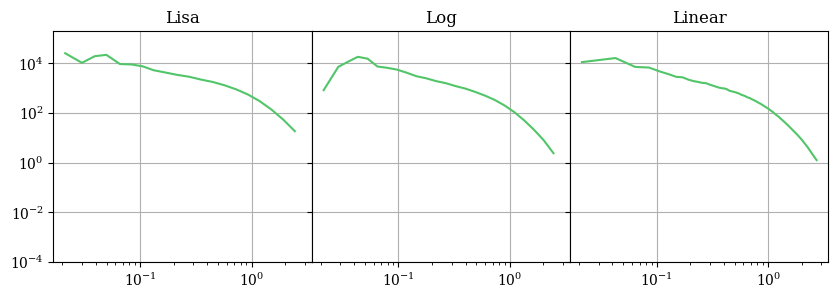

In [20]:
fig, ax = plt.subplots(1,3, figsize=(10,3), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.0)

krange = np.where(sim.k < k_res[-1])

for i in range(sim.z.size):
    if (sim.z[i] == rds['020']):
        np.savez('simu10048_slice020', k=sim.k, P=sim.Pee[i])
    if (sim.z[i] == rds['028']):
        np.savez('simu10048_slice028', k=sim.k, P=sim.Pee[i])
        ax[0].loglog(sim.k, sim.Pee[i], color=cmap_z(norm_z(sim.z[i])))

        i += 2
        ax[1].loglog(spectra_log[i][:,0] * h, (2 * np.pi**2 * spectra_log[i][:,1]) / h**3 / spectra_log[i][:,0]**3, color=cmap_z(norm_z(sim.z[i-2])))
        ax[2].loglog(spectra_lin[i][:,0] * h, (2 * np.pi**2 * spectra_lin[i][:,1]) / h**3 / spectra_lin[i][:,0]**3, color=cmap_z(norm_z(sim.z[i-2])))


ax[0].set_ylim(1e-4,2e5)
ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_title('Lisa')
ax[1].set_title('Log')
ax[2].set_title('Linear')

In [32]:
R_bins = [0.031415926535897934,
 0.03845477619246461,
 0.04707070505537381,
 0.05761706330887866,
 0.07052637049804157,
 0.08632805370454469,
 0.1056701600236425,
 0.12934593379850956,
 0.158326348578115,
 0.19379992797552964,
 0.23722148853063404,
 0.2903718035839273,
 0.3554306350526696,
 0.43506612823524404,
 0.532544235838188,
 0.651862658844204,
 0.7979147973062416,
 0.9766904348979208,
 1.1955213875485649,
 1.4633821905253188,
 1.7912581555214446,
 2.192595892239386,
 2.6838547709308522,
 3.2851819420730135]

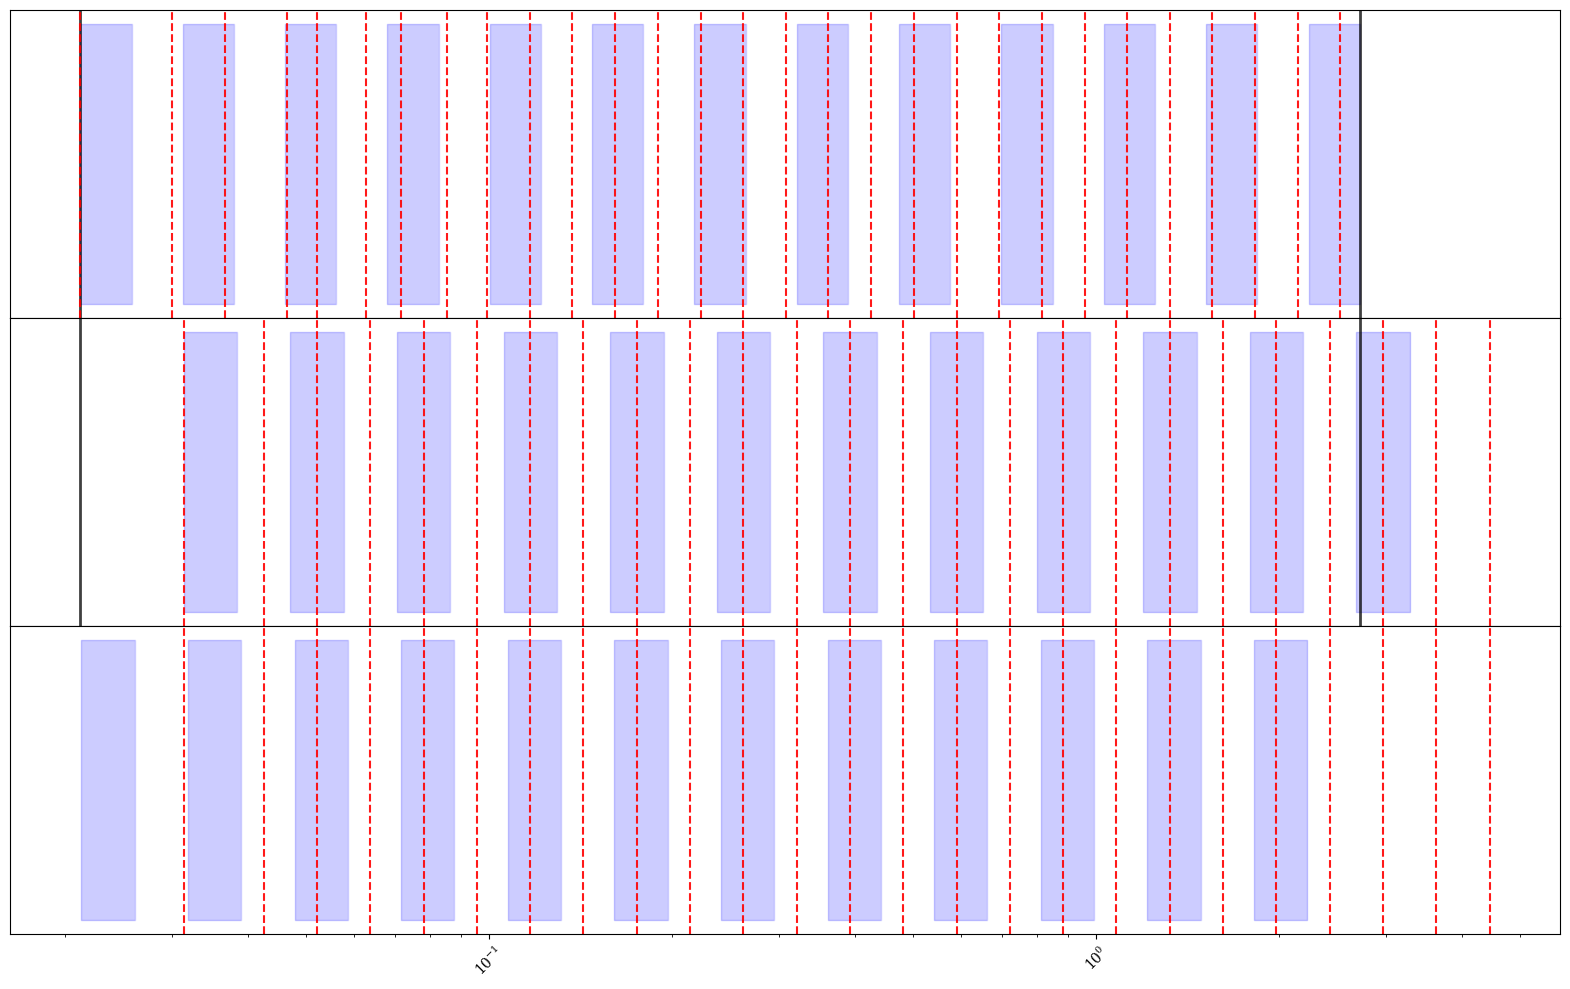

In [66]:
fig, ax = plt.subplots(3,1,figsize=(20,12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.0)

ax[0].axvline(k_res[0], color='black', alpha=.75, lw=2.)
ax[0].axvline(k_res[1], color='black', alpha=.75, lw=2.)

ax[1].axvline(k_res[0], color='black', alpha=.75, lw=2.)
ax[1].axvline(k_res[1], color='black', alpha=.75, lw=2.)

for i in range(len(k_bins)-1):
    ax[0].fill_betweenx(y=[0, 1], x1=k_bins[i], x2=k_bins[i+1],
                         alpha=.2, color='blue' if i % 2 ==0 else 'white')

# for k in k_mid:
#     ax.axvline(k, color='green', ls='-')

for k in sim.k:
    ax[0].axvline(k, color='red', ls='--', alpha=.9)

for i in range(len(R_bins)-1):
    ax[1].fill_betweenx(y=[0, 1], x1=R_bins[i], x2=R_bins[i+1],
                         alpha=.2, color='blue' if i % 2 ==0 else 'white')

for k in spectra_log[0][:,0]:
    ax[1].axvline(k, color='red', ls='--', alpha=.9)

for i in range(len(R_bins)-1):
    ax[2].fill_betweenx(y=[0, 1], x1=R_bins[i] * h, x2=R_bins[i+1] * h,
                         alpha=.2, color='blue' if i % 2 ==0 else 'white')

for k in spectra_log[0][:,0]:
    ax[2].axvline(k, color='red', ls='--', alpha=.9)


ax[0].yaxis.set_ticks([])
ax[2].yaxis.set_ticks([])

# Add more ticks on the x-axis
ax[2].set_xticks(sim.k)
x_labels = [f"{tick:.1f}" for tick in sim.k]
ax[2].set_xticklabels(x_labels, rotation=45)
ax[2].minorticks_off()

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

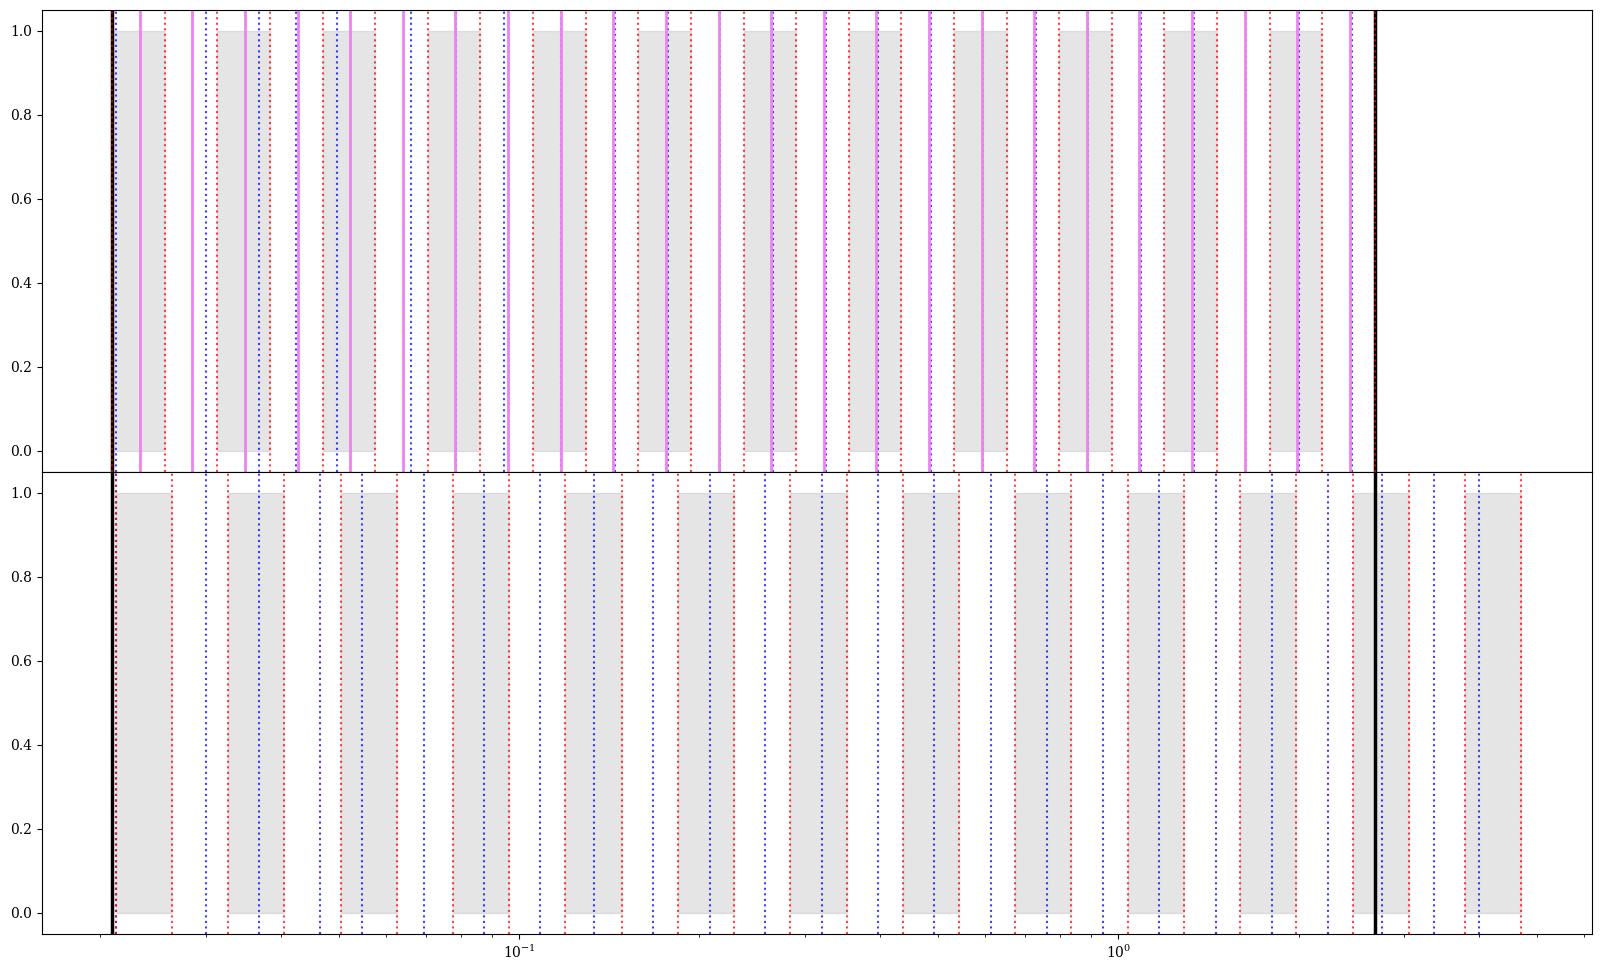

In [43]:
fig, ax = plt.subplots(2,1,figsize=(20,12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.0)


for i in range(len(k_log)-1):
    ax[0].fill_betweenx(y=[0, 1], x1=k_log[i], x2=k_log[i+1], alpha=.2, color='gray' if i % 2 ==0 else 'white')

# for k in k_mid:
#     ax.axvline(k, color='green', ls='-')

ax[0].axvline(k_res[0], color='black', lw=2.5)
ax[0].axvline(k_res[1], color='black', lw=2.5)

for k in binave[1]:
    ax[0].axvline(k, color='blue', ls=':', alpha=.75)

for k in nobinave[1]:
    ax[0].axvline(k, color='red', ls=':', alpha=.75)

for k in k_mid:
    ax[0].axvline(k, color='violet', ls='-', alpha=1.0, lw=2)

for i in range(len(nobinave25[1])-1):
    ax[1].fill_betweenx(y=[0, 1], x1=nobinave25[1][i], x2=nobinave25[1][i+1], alpha=.2, color='gray' if i % 2 ==0 else 'white')

# for k in k_mid:
#     ax.axvline(k, color='green', ls='-')

for k in binave25[1]:
    ax[1].axvline(k, color='blue', ls=':', alpha=.75)

for k in nobinave25[1]:
    ax[1].axvline(k, color='red', ls=':', alpha=.75)

# for k in k_mid:
#     ax[0].axvline(k, color='violet', ls=':', alpha=.5, lw=1.5)

# for k in spectra_log[0][:,0]:
#     ax.axvline(k, color='red', ls='-')

ax[1].axvline(k_res[0], color='black', lw=2.5)
ax[1].axvline(k_res[1], color='black', lw=2.5)

ax[0].set_xscale('log')
ax[1].set_xscale('log')


In [50]:
directory = f'{home_dir}/fresh_LoReLi_sims/simu10038'
# for file_name in os.listdir(directory):
#             file_path = os.path.join(directory, file_name)
#             if os.path.isfile(file_path):  # Ensure it's a file, not a directory
                # # Load each file as text or binary
                # with open(file_path, 'r' if load_as_text else 'rb') as f:
   
spectra_lin = []
spectra_log = []

rd_log = []
rd_lin = []  
             #     file_data[file_path] = f.read()
for key in rds.keys():
    file_log = f'{directory}/powerspectrum_electrons{key}_logbins.dat'
    if os.path.isfile(file_log):
        print(f'Log has file {key}')
        s_log = np.genfromtxt(file_log)
        spectra_log.append(s_log)
        rd_log.append(rds[key])

    file_lin = f'{directory}/powerspectrum_electrons{key}.dat'
    if os.path.isfile(file_lin):
        print(f'Lin has file {key}')
        s_lin = np.genfromtxt(file_lin)
        spectra_lin.append(s_lin)
        rd_lin.append(rds[key])

    print()






Log has file 006
Lin has file 006

Log has file 007
Lin has file 007

Log has file 008
Lin has file 008

Log has file 009
Lin has file 009

Log has file 010
Lin has file 010

Log has file 011
Lin has file 011

Log has file 012
Lin has file 012

Log has file 013
Lin has file 013

Log has file 014
Lin has file 014

Log has file 015
Lin has file 015

Log has file 016
Lin has file 016

Log has file 017
Lin has file 017

Log has file 018
Lin has file 018

Log has file 019
Lin has file 019

Log has file 020
Lin has file 020

Log has file 021
Lin has file 021

Log has file 022
Lin has file 022

Log has file 023
Lin has file 023

Log has file 024
Lin has file 024

Log has file 025
Lin has file 025

Log has file 026
Lin has file 026

Log has file 027
Lin has file 027

Log has file 028
Lin has file 028

Log has file 029
Lin has file 029

Log has file 030
Lin has file 030

Log has file 031
Lin has file 031

Log has file 032
Lin has file 032

Log has file 033
Lin has file 033

Log has file 03

(0.0001, 200000.0)

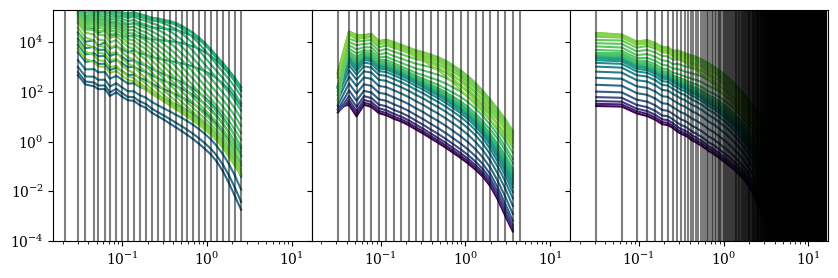

In [53]:
fig, ax = plt.subplots(1,3, figsize=(10,3), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.0)

for i in range(sim.z.size):
    ax[0].loglog(sim.k, sim.Pee[i], color=cmap_z(norm_z(sim.z[i])))
    
for i in range(len(spectra_log)):
    ax[1].loglog(spectra_log[i][:,0], (2 * np.pi**2 * spectra_log[i][:,1]) / spectra_log[i][:,0]**3, color=cmap_z(norm_z(rd_log[i])))
    ax[2].loglog(spectra_lin[i][:,0], (2 * np.pi**2 * spectra_lin[i][:,1]) / spectra_lin[i][:,0]**3, color=cmap_z(norm_z(rd_lin[i])))

[ax[0].axvline(k, color='black', alpha=.5) for k in sim.k]
[ax[1].axvline(k, color='black', alpha=.5) for k in spectra_log[i][:,0]]
[ax[2].axvline(k, color='black', alpha=.5) for k in spectra_lin[i][:,0]]

ax[0].set_ylim(1e-4,2e5)

IndexError: index 30 is out of bounds for axis 0 with size 30

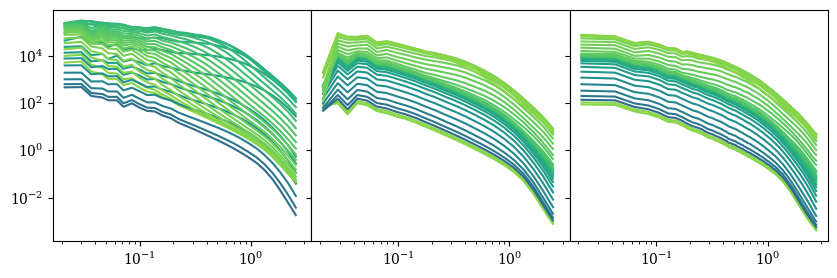

In [54]:
fig, ax = plt.subplots(1,3, figsize=(10,3), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.0)

krange = np.where(sim.k < k_res[-1])

for i in range(sim.z.size):
    ax[0].loglog(sim.k[krange], sim.Pee[i-2][krange], color=cmap_z(norm_z(sim.z[i-2])))
for i in range(len(spectra_log)):
    ax[1].loglog(spectra_log[i][:,0] * h, (2 * np.pi**2 * spectra_log[i][:,1]) / h**3 / spectra_log[i][:,0]**3, color=cmap_z(norm_z(sim.z[i-2])))
    ax[2].loglog(spectra_lin[i][:,0] * h, (2 * np.pi**2 * spectra_lin[i][:,1]) / h**3 / spectra_lin[i][:,0]**3, color=cmap_z(norm_z(sim.z[i-2])))


ax[0].set_ylim(1e-4,2e5)
ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_title('Lisa')
ax[1].set_title('Log')
ax[2].set_title('Linear')

In [ ]:
np.diff(sim.k)

In [9]:
200 / h 

294.9852507374631

In [ ]:
fig, ax = plt.subplots()

#ax.loglog(sim.k, sim.Pee[0])
ax.loglog(spectra_log[0][:,0],  spectra_log[0][:,1], label='log')
ax.loglog(spectra_lin[0][:,0], spectra_lin[0][:,1], label='linear')

ax.axvline(1.0)
ax.axhline(8.10e-3)

ax.set_ylim(1e-5,1e-1)
ax.legend()

In [ ]:
fig, ax = plt.subplots()

#ax.loglog(sim.k, sim.Pee[0])
ax.loglog(spectra_log[0][:,0],  spectra_log[0][:,1], label='log')
ax.loglog(spectra_lin[0][:,0], spectra_lin[0][:,1], label='linear')

ax.axvline(1.0)
ax.axhline(8.10e-3)

ax.set_ylim(1e-5,1e-1)
ax.legend()

In [ ]:
fig, ax = plt.subplots()

#ax.loglog(sim.k, sim.Pee[0])
# for i in range(len(spectra_log)):
#     ax.loglog(spectra_log[i][:,0], spectra_log[i][:,1], label='log', lw=.8, alpha=.5, color='k')

ax.loglog(spectra_lin[2][:,0] * h, spectra_lin[2][:,1] * h**3, label='linear')
ax.loglog(spectra_log[2][:,0], spectra_log[2][:,1], label='linear')

ax.set_ylim(1e-5,1e-1)
#ax.legend()

In [ ]:
fig, ax = plt.subplots()

[ax.axvline(k) for k in sim.k]

check = np.geomspace(sim.k[0], sim.k[-1], 25)

[ax.axvline(k, color='black', ls='--') for k in check]

ax.set_xscale('log')

In [ ]:
k1 = np.argmin(np.abs(spectra_log[0][:,0]-1))

In [ ]:
spectra_log[0][:,0] / sim.k

In [ ]:
spectra_log[0][:,0], k_res[0]